### <i> Detecting Cyber Attacks With Machine Learning </i>

### <i> Import Library Files </i>

In [1]:
import pandas as pd

import warnings

# Suppress warnings

warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv("/kaggle/input/creating-a-smaller-dataset-for-ciciot2023/0.1percent_2classes.csv")

In [3]:
dataset

,flow_duration,header_length,protocol_type,duration,rate,srate,drate,fin_flag_number,syn_flag_number,rst_flag_number,...,std,tot_size,iat,number,radius,covariance,variance,weight,magnitude,benign
0,0.000000,54,TCP,64.00,48,48,0.0,True,False,True,...,0.000000,54.00,83345000.0,9.5,0.000000,0.000000,0.00,141.55,10.392304,False
1,0.000000,55,TCP,65.91,29,29,0.0,False,True,False,...,1.072485,55.60,82985560.0,9.5,1.528833,38.961185,0.03,141.55,10.416152,False
2,0.035177,17230,UDP,64.00,24362,24362,0.0,False,False,False,...,0.000000,50.00,83102410.0,9.5,0.000000,0.000000,0.00,141.55,10.000000,False
3,3.932406,389809,EGP,109.80,85,85,0.0,False,False,False,...,798.802860,672.00,166521020.0,13.5,1128.301500,636962.060000,1.00,244.60,48.637638,True
4,0.069597,11323,UDP,68.40,7890,7890,0.0,False,False,False,...,11.195639,54.62,83487416.0,9.5,15.865254,763.990700,0.26,141.55,10.310076,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4668648,1.339964,108,TCP,64.00,1,1,0.0,False,True,False,...,0.000000,54.00,83362300.0,9.5,0.000000,0.000000,0.00,141.55,10.392304,False
4668649,0.000000,54,TCP,64.00,3,3,0.0,False,False,False,...,0.000000,54.00,83033544.0,9.5,0.000000,0.000000,0.00,141.55,10.392304,False
4668650,0.032898,19713,CHAOS,63.78,12349,12349,0.0,False,False,False,...,0.198798,50.08,83106910.0,9.5,0.281749,0.399832,0.10,141.55,10.005357,False
4668651,0.000000,54,TCP,64.00,5,5,0.0,False,True,False,...,0.000000,54.00,82985464.0,9.5,0.000000,0.000000,0.00,141.55,10.392304,False


### <i> Dataset Overview </i>

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4668653 entries, 0 to 4668652
Data columns (total 47 columns):
 #   Column           Dtype  
---  ------           -----  
 0   flow_duration    float64
 1   header_length    int64  
 2   protocol_type    object 
 3   duration         float64
 4   rate             int64  
 5   srate            int64  
 6   drate            float64
 7   fin_flag_number  bool   
 8   syn_flag_number  bool   
 9   rst_flag_number  bool   
 10  psh_flag_number  bool   
 11  ack_flag_number  bool   
 12  ece_flag_number  bool   
 13  cwr_flag_number  bool   
 14  ack_count        float64
 15  syn_count        float64
 16  fin_count        int64  
 17  urg_count        int64  
 18  rst_count        int64  
 19  http             bool   
 20  https            bool   
 21  dns              bool   
 22  telnet           bool   
 23  smtp             bool   
 24  ssh              bool   
 25  irc              bool   
 26  tcp              bool   
 27  udp         

In [5]:
dataset.describe()

,flow_duration,header_length,duration,rate,srate,drate,ack_count,syn_count,fin_count,urg_count,...,avg,std,tot_size,iat,number,radius,covariance,variance,weight,magnitude
count,4.668653e+06,4.668653e+06,4.668653e+06,4.668653e+06,4.668653e+06,4.668653e+06,4.668653e+06,4.668653e+06,4.668653e+06,4.668653e+06,...,4.668653e+06,4.668653e+06,4.668653e+06,4.668653e+06,4.668653e+06,4.668653e+06,4.668653e+06,4.668653e+06,4.668653e+06,4.668653e+06
mean,5.917033e+00,7.674697e+04,6.634689e+01,8.997175e+03,8.997175e+03,3.906502e-06,9.054137e-02,3.304779e-01,7.409653e-02,6.217616e+00,...,1.246893e+02,3.332165e+01,1.247175e+02,8.318595e+07,9.498655e+00,4.709003e+01,3.049848e+04,9.646280e-02,1.415167e+02,1.312275e+01
std,2.862161e+02,4.616669e+05,1.399191e+01,9.881923e+04,9.881923e+04,3.332958e-03,2.863772e-01,6.637783e-01,2.897588e-01,7.200822e+01,...,2.409622e+02,1.596930e+02,2.414484e+02,1.704805e+07,8.192271e-01,2.258586e+02,3.098913e+05,2.330517e-01,2.107041e+01,8.629672e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.200000e+01,0.000000e+00,4.200000e+01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,9.165152e+00
25%,0.000000e+00,5.400000e+01,6.400000e+01,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.000000e+01,0.000000e+00,5.000000e+01,8.307157e+07,9.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.415500e+02,1.000000e+01
50%,0.000000e+00,5.400000e+01,6.400000e+01,1.500000e+01,1.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.400000e+01,0.000000e+00,5.400000e+01,8.312452e+07,9.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.415500e+02,1.039230e+01
75%,1.050145e-01,2.790000e+02,6.400000e+01,1.170000e+02,1.170000e+02,0.000000e+00,0.000000e+00,6.000000e-02,0.000000e+00,0.000000e+00,...,5.404699e+01,3.719096e-01,5.406000e+01,8.334391e+07,9.500000e+00,5.059213e-01,1.344216e+00,8.000000e-02,1.415500e+02,1.039672e+01
max,9.958709e+04,9.842329e+06,2.550000e+02,8.388608e+06,8.388608e+06,6.799535e+00,5.900000e+00,1.263000e+01,8.000000e+01,4.190000e+03,...,1.358300e+04,8.290916e+03,1.358300e+04,1.676394e+08,1.500000e+01,1.172513e+04,7.713750e+07,1.000000e+00,2.446000e+02,1.648211e+02


### <i> Data Preprocessing </i>

In [6]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer

In [7]:
# List of numerical and categorical features

numerical_features = dataset.select_dtypes(include=['float64', 'int64']).columns.tolist()

categorical_features = dataset.select_dtypes(include=['object']).columns.tolist()

In [8]:
# 2. Define preprocessing for numerical and categorical features

numerical_transformer = Pipeline(steps=[

    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean

    ('scaler', StandardScaler())                   # Scale numerical features

])



categorical_transformer = Pipeline(steps=[

    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Fill missing with a placeholder

    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features

])

In [9]:
# 3. Combine preprocessing steps

preprocessor = ColumnTransformer(

    transformers=[

        ('num', numerical_transformer, numerical_features),

        ('cat', categorical_transformer, categorical_features)

    ]

)

### <i> Expolatory Data Analysis </i>

In [10]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

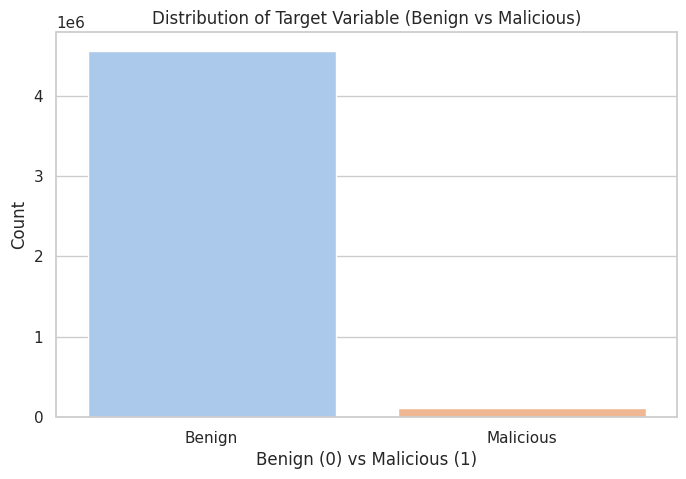

In [11]:
# Set the aesthetics for seaborn

sns.set(style="whitegrid")



# 1. Visualizing the distribution of the target variable

plt.figure(figsize=(8, 5))

sns.countplot(data=dataset, x='benign', palette='pastel')

plt.title('Distribution of Target Variable (Benign vs Malicious)')

plt.xlabel('Benign (0) vs Malicious (1)')

plt.ylabel('Count')

plt.xticks(ticks=[0, 1], labels=['Benign', 'Malicious'])

plt.show()

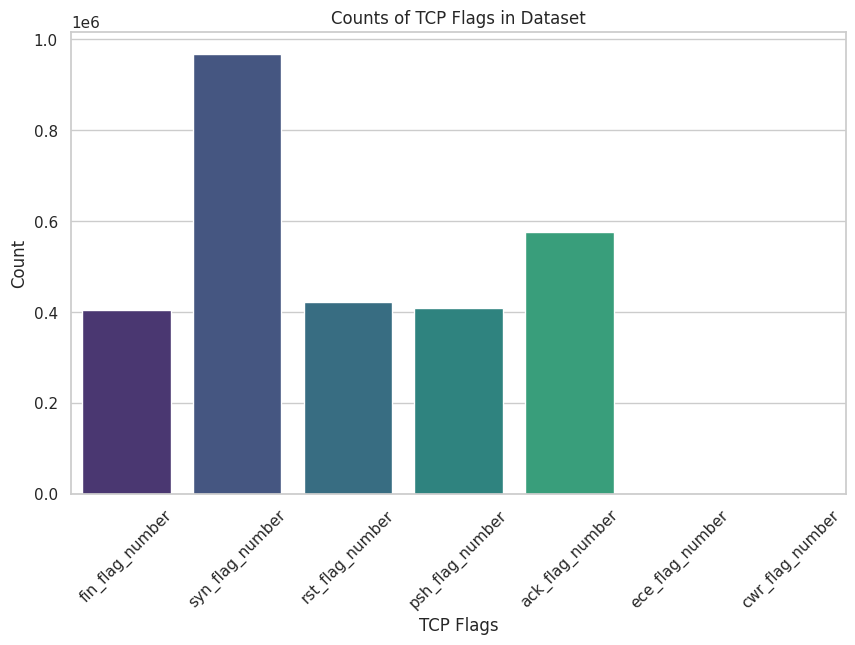

In [12]:
# 5. Visualizing flag counts

flag_columns = ['fin_flag_number', 'syn_flag_number', 'rst_flag_number', 

                'psh_flag_number', 'ack_flag_number', 'ece_flag_number', 

                'cwr_flag_number']



flag_counts = dataset[flag_columns].sum()



plt.figure(figsize=(10, 6))

sns.barplot(x=flag_counts.index, y=flag_counts.values, palette='viridis')

plt.title('Counts of TCP Flags in Dataset')

plt.xlabel('TCP Flags')

plt.ylabel('Count')

plt.xticks(rotation=45)

plt.show()

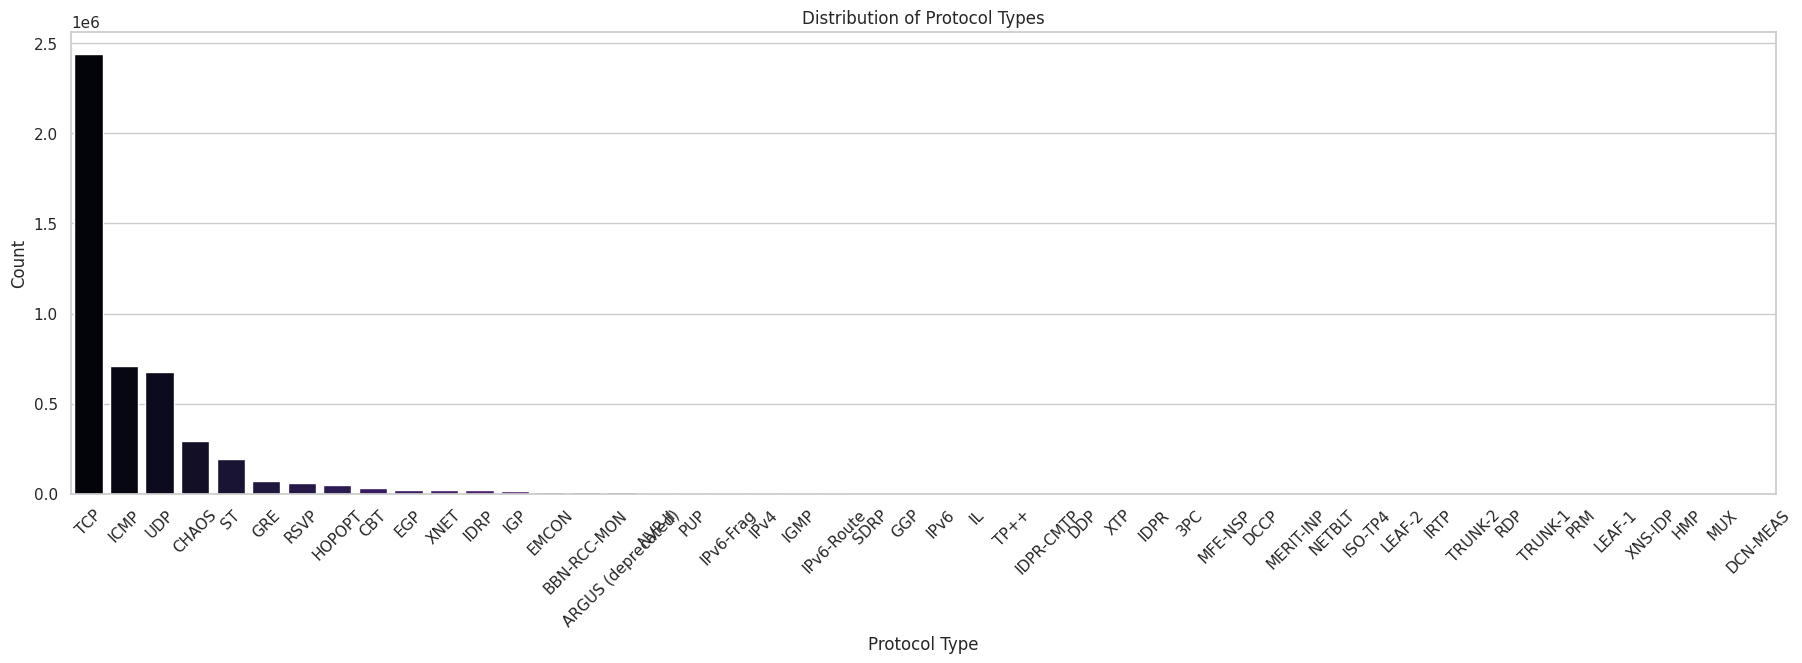

In [13]:
# 6. Visualizing protocol types

protocol_counts = dataset['protocol_type'].value_counts()



plt.figure(figsize=(22, 6))

sns.barplot(x=protocol_counts.index, y=protocol_counts.values, palette='magma')

plt.title('Distribution of Protocol Types')

plt.xlabel('Protocol Type')

plt.ylabel('Count')

plt.xticks(rotation=45)

plt.show()

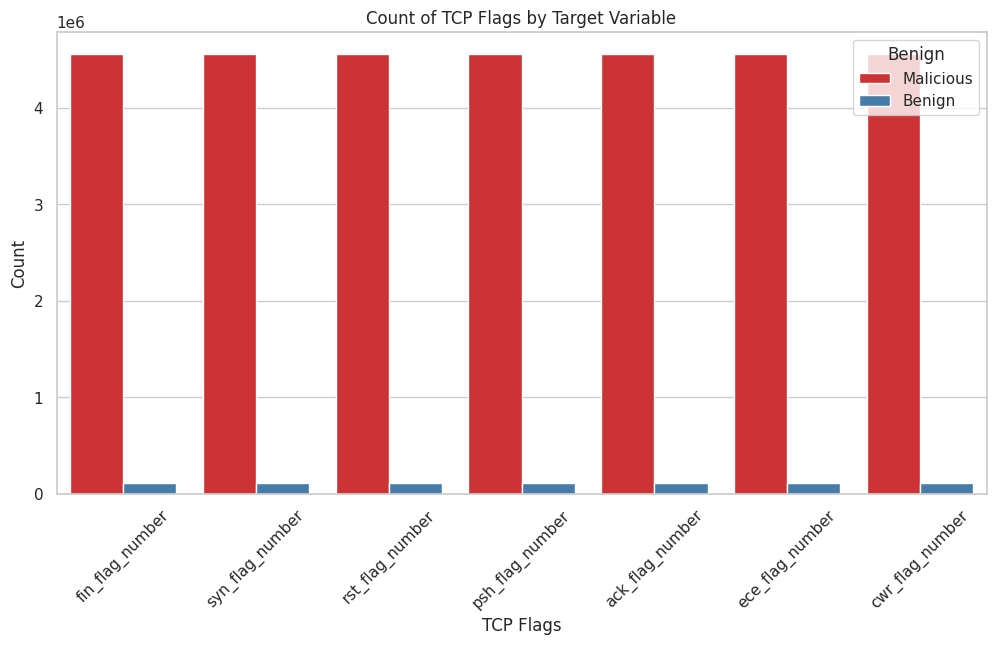

In [14]:
# 8. Count plot for flag features by target variable

plt.figure(figsize=(12, 6))

flag_features = dataset[flag_columns + ['benign']]

flag_features_melted = flag_features.melt(id_vars='benign', value_vars=flag_columns)



sns.countplot(data=flag_features_melted, x='variable', hue='benign', palette='Set1')

plt.title('Count of TCP Flags by Target Variable')

plt.xlabel('TCP Flags')

plt.ylabel('Count')

plt.xticks(rotation=45)

plt.legend(title='Benign', labels=['Malicious', 'Benign'])

plt.show()

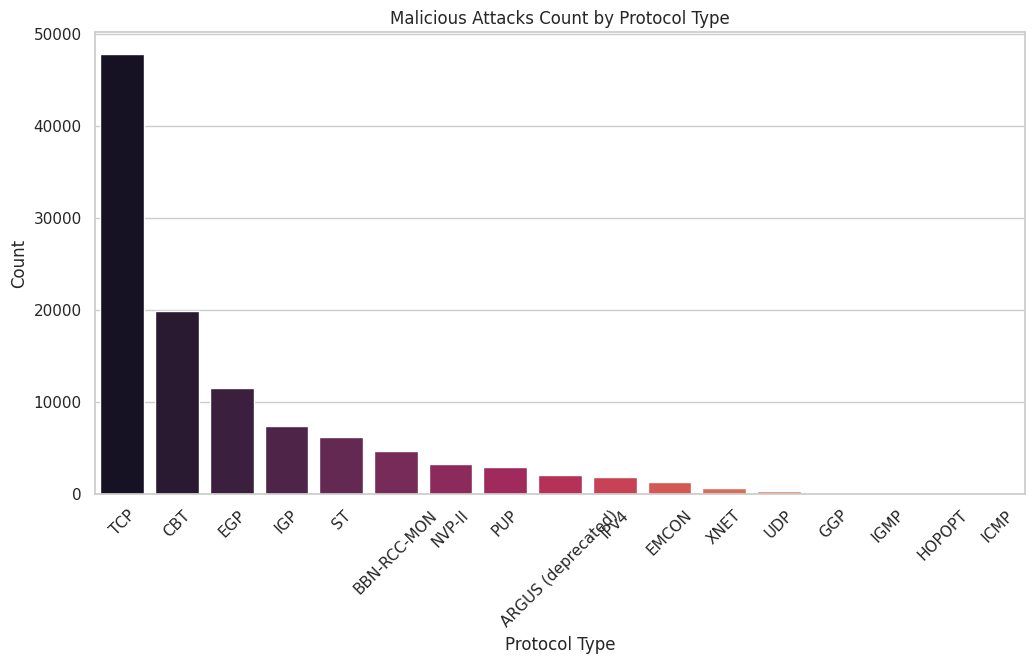

In [15]:
# 13. Count of malicious attacks by protocol type

plt.figure(figsize=(12, 6))

malicious_protocol_counts = dataset[dataset['benign'] == 1]['protocol_type'].value_counts()

sns.barplot(x=malicious_protocol_counts.index, y=malicious_protocol_counts.values, palette='rocket')

plt.title('Malicious Attacks Count by Protocol Type')

plt.xlabel('Protocol Type')

plt.ylabel('Count')

plt.xticks(rotation=45)

plt.show()

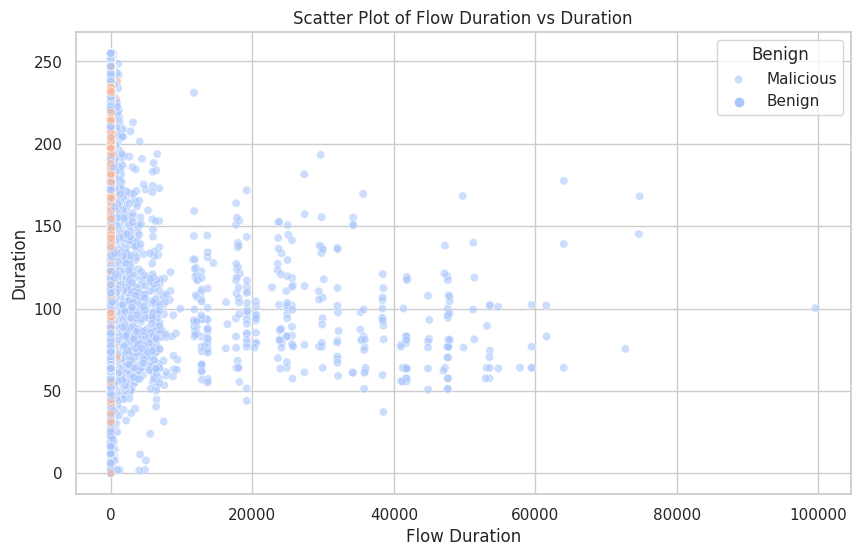

In [16]:
# 11. Scatter plots for feature pairs colored by target variable

plt.figure(figsize=(10, 6))

sns.scatterplot(data=dataset, x='flow_duration', y='duration', hue='benign', alpha=0.6, palette='coolwarm')

plt.title('Scatter Plot of Flow Duration vs Duration')

plt.xlabel('Flow Duration')

plt.ylabel('Duration')

plt.legend(title='Benign', labels=['Malicious', 'Benign'])

plt.show()

### <i> Modeling </i>

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

import warnings




In [18]:
# If 'protocol_type' is categorical

dataset['protocol_type'] = LabelEncoder().fit_transform(dataset['protocol_type'])



# Splitting the dataset into features and target variable

X = dataset.drop('benign', axis=1)  # Features

y = dataset['benign']  # Target variable


In [19]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



# Feature scaling

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)



# Model Training and Evaluation

def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    

    print(f"Model: {model.__class__.__name__}")

    print("Accuracy:", accuracy_score(y_test, y_pred))

    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    print("Classification Report:\n", classification_report(y_test, y_pred))

    print("="*50)


In [20]:
# 1. Logistic Regression

log_reg = LogisticRegression(max_iter=1000)

train_and_evaluate_model(log_reg, X_train, X_test, y_train, y_test)

Model: LogisticRegression
Accuracy: 0.988871527238573
Confusion Matrix:
 [[907399   4367]
 [  6024  15941]]
Classification Report:
               precision    recall  f1-score   support

       False       0.99      1.00      0.99    911766
        True       0.78      0.73      0.75     21965

    accuracy                           0.99    933731
   macro avg       0.89      0.86      0.87    933731
weighted avg       0.99      0.99      0.99    933731



In [21]:
# 2. Random Forest Classifier

rf_classifier = RandomForestClassifier(random_state=42)

train_and_evaluate_model(rf_classifier, X_train, X_test, y_train, y_test)


Model: RandomForestClassifier
Accuracy: 0.9975185572718481
Confusion Matrix:
 [[910377   1389]
 [   928  21037]]
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00    911766
        True       0.94      0.96      0.95     21965

    accuracy                           1.00    933731
   macro avg       0.97      0.98      0.97    933731
weighted avg       1.00      1.00      1.00    933731

